# CNN implementation on Dementia Dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2 as cv
import os, sys

In [41]:
path1='/content/drive/MyDrive/Alzheimer Dataset/NonDemented'
path2='/content/drive/MyDrive/Alzheimer Dataset/MildDemented'
path3='//content/drive/MyDrive/Alzheimer Dataset/ModerateDemented'
files1=os.listdir(path1)
files2=os.listdir(path2)
files3=os.listdir(path3)
Num_files_N=len(files1)
Num_files_MD=len(files2)
Num_files_D=len(files3)
dataset_len=Num_files_N+Num_files_MD+Num_files_D

In [ ]:
len(files3)


# Dataset Creation

For every file

1. Read the image
2. Convert it to grayscale (Optional)
3. Resize to (100,100)
4. Preprocessing: Normalization
5. Reshape to (100,100,1)
6. Create the dataset

In [ ]:
data=np.zeros((dataset_len,100,100,1))
label=[]
data.shape

In [56]:
for i in range(Num_files_N):
    name=path1+'/'+files1[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i,:,:]=img_gs
    label.append('Normal')


In [ ]:
plt.imshow(data[99],cmap='gray')

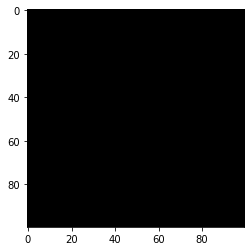

In [ ]:
plt.imshow(data[100],cmap='gray')

In [58]:
for i in range(Num_files_MD):
    name=path2+'/'+files2[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i+Num_files_N,:,:]=img_gs
    label.append('Mild Dementia')

In [59]:
for i in range(Num_files_D):
    name=path3+'/'+files3[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i+Num_files_N+Num_files_MD,:,:]=img_gs
    label.append('Dementia')


In [ ]:
plt.imshow(data[100],cmap='gray')

Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab=le.fit_transform(label)

In [ ]:
label

In [ ]:
lab

Train and test dataset spilt

In [61]:
train_images,test_images,train_labels,test_labels=train_test_split(data,lab,test_size=0.2,random_state=1)

In [ ]:
print('Train Dataset Size:',np.size(train_labels))
print('Test Dataset Size:',np.size(test_labels))

# Define the CNN architecture

Create the convolutional base

1. Convolutional : 32 filters 3x3
2. Maxpooling: 2x2
3. Convolutional : 64 filters 5x5
4. Convolutional : 32 filters 3x3
5. Maxpooling: 3x3


In [63]:
network=models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(100,100,1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(7,7),activation='relu'))
network.add(layers.Conv2D(32,(3,3),activation='relu'))
network.add(layers.MaxPooling2D((3,3)))

Check summary of convolutional base

In [ ]:
network.summary()

Build the classifier on top of the convolutional base

In [78]:
network.add(layers.Flatten())
network.add(layers.Dense(80,activation='relu'))
network.add(layers.Dense(50,activation='relu'))
network.add(layers.Dense(3,activation='softmax'))

In [ ]:
network.summary()

Compile and train the model

In [82]:
network.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
test_labels

In [ ]:
trained_network=network.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

In [ ]:
train_labels.shape

In [ ]:
plt.plot(trained_network.history['accuracy'],label='Training Accuracy')
plt.plot(trained_network.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(trained_network.history['loss'],label='Training Loss')
plt.plot(trained_network.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

Evaluate the network

In [ ]:
test_loss,test_acc=network.evaluate(test_images,test_labels)

In [ ]:
y_predict=network.predict(test_images)

In [90]:
y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))

In [ ]:
print(metrics.confusion_matrix(test_labels,y_pred))

In [ ]:
print(metrics.accuracy_score(test_labels,y_pred))